## Week 3, Visualize and understand ModelE-BiomeE results

In this week's tutorial, we visualize the output from ModelE-BiomeE. There are many dimensions and variables here. We select a few for animations, and will let you explore the data themselves. While exploring, thinking that the data are conditional a few key parameters. If we were to use ML to run the simulations, what would the input and output might be and how the neural network may look like? This is a completely exploratory analysis so feel free to think of the potential solutions (or not having one is completely fine). 

## Let's import packages

In [13]:
%matplotlib inline

In [14]:
import numpy as np
import netCDF4 as nc4
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import time


## Set datapath and read the data, but not loading them yet

In the first dataset, there are four variables: dict_keys(['Longitude', 'Latitude', 'Years', 'GridData'])

In the second dataset, there are more variables: dict_keys(['Longitude', 'Latitude', 'Years', 'DBH_Bins', 'PFT', 'LAI', 'GPP', 'NPP', 'Rh', 'cveg', 'cwood', 'CA', 'BA', 'height', 'Hmax', 'Hcrt', 'WBgrowth', 'BAgrowth', 'WDmort', 'DENmort', 'nstem_size', 'cwood_size', 'stemmort_size', 'cmort_size', 'BA_size'])

If you don't know what these variables mean, ChatGPT has a pretty good guess given sufficient context. 

In [15]:
ncpath = './'

f_datagrid = nc4.Dataset( ncpath + 'BiomeE_AllGridData.nc', 'r' )
print(f_datagrid.variables.keys())

f_CO2DBH = nc4.Dataset( ncpath + 'BiomeE_Global_IncreasingCO2_DBH10cm.nc', 'r' )
print(f_CO2DBH.variables.keys())


dict_keys(['Longitude', 'Latitude', 'Years', 'GridData'])
dict_keys(['Longitude', 'Latitude', 'Years', 'DBH_Bins', 'PFT', 'LAI', 'GPP', 'NPP', 'Rh', 'cveg', 'cwood', 'CA', 'BA', 'height', 'Hmax', 'Hcrt', 'WBgrowth', 'BAgrowth', 'WDmort', 'DENmort', 'nstem_size', 'cwood_size', 'stemmort_size', 'cmort_size', 'BA_size'])


## Show one variable, of one specific year

(601, 90, 144)


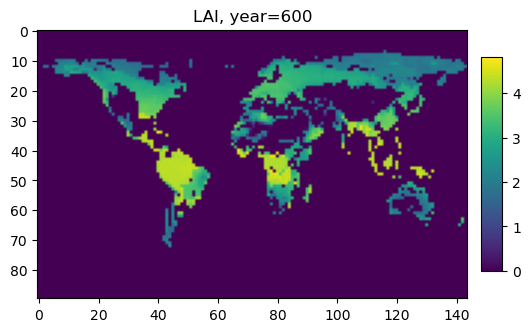

In [16]:
var = 'LAI'
data = f_CO2DBH.variables[var][:]
print(data.shape)
iyear = 600


### show the 600th year of the data, the variable is LAI
fig = plt.figure(figsize=(6,5),dpi=100)
ax = plt.gca()
im = data[iyear,:,:]
im = np.flipud(im)
img = ax.imshow(im)
cbar = fig.colorbar(img, ax=ax, fraction=0.046, pad=0.03, aspect=10)
plt.title(var + ', year=' + str(iyear))
plt.show() 

## Pick six variables and calculate their statistics
Prepare to plot them over 600 years. 

In [17]:
#%% check variable minmax
variables = ['LAI', 'GPP', 'NPP', 'Rh', 'cveg', 'height']
arrays = []
for each in variables:
    arrays.append(f_CO2DBH.variables[each][:])
vmaxs = {}
for each in variables:
    _ = f_CO2DBH.variables[each][:]
    _05 = np.percentile(_, 2)
    _95 = np.percentile(_, 98)
    print(each, f_CO2DBH.variables[each][:].min(), _05, _95, f_CO2DBH.variables[each][:].max() )
    vmaxs[each] = _95




LAI 0.0 0.0 4.239385 5.616588
GPP 0.0 0.0 2.457201 3.748626
NPP 0.0 0.0 1.454862 2.222849
Rh 0.0 0.0 1.410245 2.45467
cveg 0.0 0.0 27.014027 42.02378
height 0.0 0.0 25.734957 40.291218


## Visualize multiple years
Now we visualize six selected variables from year 0 to year 600

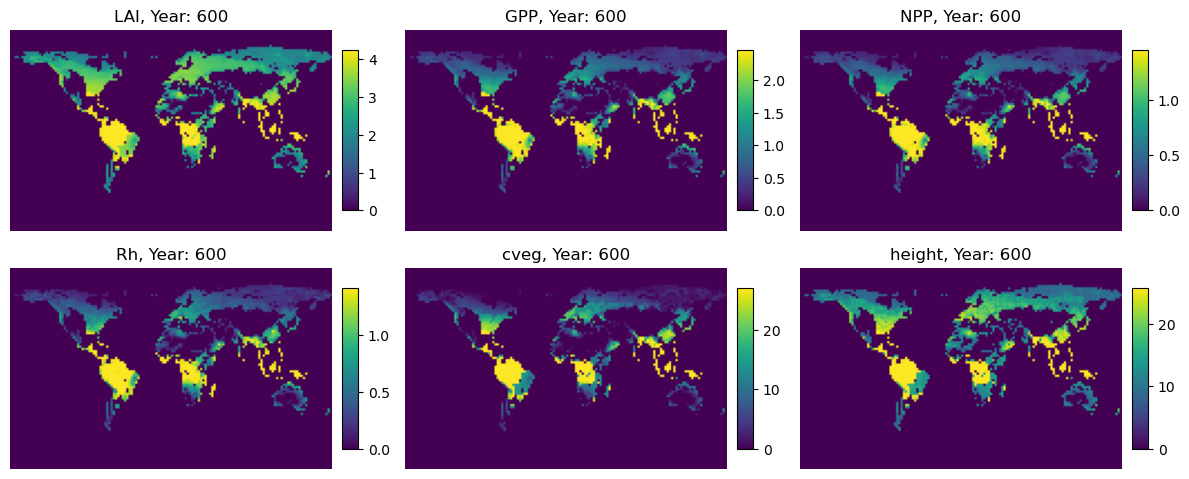

In [18]:
#%%
for iyear in np.arange(0,601,10):
    clear_output(wait=True)
    iyear = iyear  # or any index within your data range
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 5))
    for ax, data, title in zip(axes.flat, arrays, variables):
        im = np.flipud(data[iyear])  # flip vertically if needed
        im_plot = ax.imshow(im, cmap='viridis', vmin=0, vmax=vmaxs[title])
        ax.set_title(f'{title}, Year: {iyear}')
        ax.axis('off')
        plt.colorbar(im_plot, ax=ax, fraction=0.046, pad=0.03, aspect=10)
    plt.tight_layout()
    plt.show()

    time.sleep(0.1)
    plt.close(fig) 


## Concentrate on an area to see its changes over the years

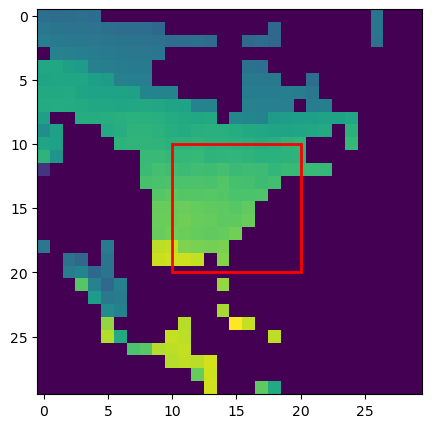

In [19]:
datas_flip = []
for i in range(len(arrays)):
    datas_flip.append(np.flip(arrays[i],axis=1))

x1, x2 = 20,30
y1, y2 = 35,45
nbuffer = 10
rect = patches.Rectangle(
    (y1 - (y1 - nbuffer), x1 - (x1 - nbuffer)),   # (x, y) = (col, row)
    y2 - y1,                                      # width
    x2 - x1,                                      # height
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)

fig = plt.figure(figsize=(6,5),dpi=100)
data = datas_flip[0][600]
plt.imshow(data[x1-nbuffer:x2+nbuffer, y1-nbuffer:y2+nbuffer])
plt.gca().add_patch(rect)
plt.show()

## Plot the changes over the years

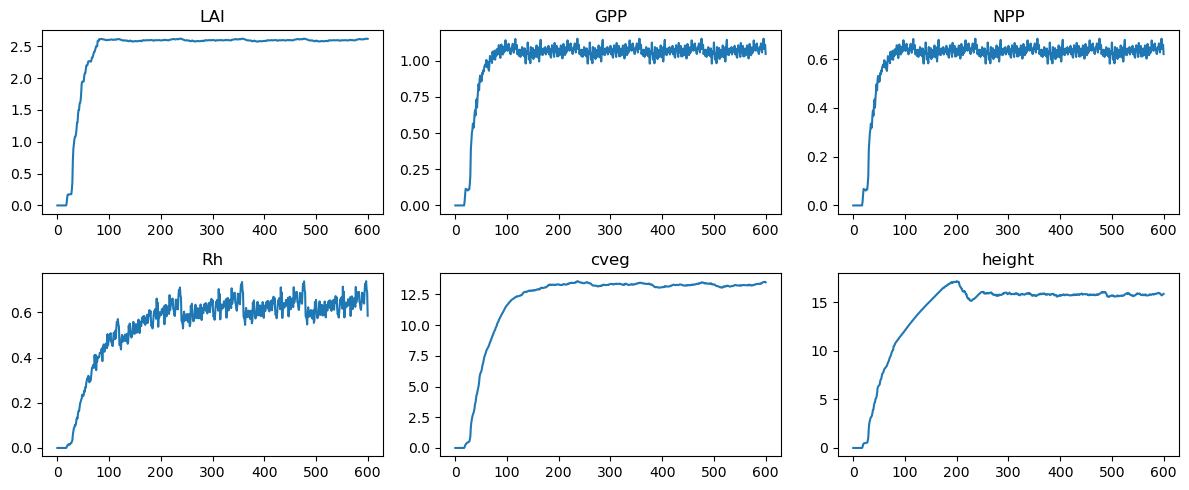

In [22]:
yrange = np.arange(datas_flip[0].shape[0])
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
for ax, data, title in zip(axes.flat, datas_flip, variables):
    ymean = np.mean(data[:,x1:x2,y1:y2], axis=(1,2))   # use mean or sum?
    ax.plot(yrange, ymean)
    ax.set_title(f'{title}')
plt.tight_layout()
plt.show()
